<a href="https://colab.research.google.com/github/Rohith616/Client-Project-1/blob/main/GluonTS_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mxnet

     |████████████████████████████████| 47.3 MB 1.9 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install gluonts

     |████████████████████████████████| 2.8 MB 18.6 MB/s 
     |████████████████████████████████| 10.9 MB 39.8 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [ ]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.mx.trainer import Trainer

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
data = pd.read_csv('/content/preprocessed_data.csv', header=0, index_col=0)

data

,ds,target_id,target_address,y,event,cat_r,reg_wind,reg_r,holiday,weather,temp_max,temp_min
0,2015-01-01,0,東京都/東京,89.058108,NaN,cat_r_1,4.4,17.856631,元日,cloud,8.2,0.7
1,2015-01-02,0,東京都/東京,88.638431,NaN,cat_r_0,2.1,-2.435871,NaN,sunny,7.9,-2.2
2,2015-01-03,0,東京都/東京,80.884749,NaN,cat_r_1,3.0,15.382444,NaN,sunny,8.9,-1.1
3,2015-01-04,0,東京都/東京,89.288376,NaN,cat_r_0,1.3,11.864588,NaN,cloud,9.3,-0.4
4,2015-01-05,0,東京都/東京,86.867064,NaN,cat_r_1,2.4,-14.973754,NaN,sunny,12.9,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1748,2019-10-15,1,大阪府/大阪,156.960567,NaN,cat_r_1,2.8,2.630001,NaN,sunny,23.1,14.6
1749,2019-10-16,1,大阪府/大阪,130.886110,event2,cat_r_1,2.2,23.602167,NaN,sunny,22.4,12.8
1750,2019-10-17,1,大阪府/大阪,137.061111,event2,cat_r_1,1.8,18.308426,NaN,cloud,23.7,14.3
1751,2019-10-18,1,大阪府/大阪,139.740341,NaN,cat_r_1,2.5,2.687561,NaN,cloud,24.0,18.4


In [ ]:
data['event'].fillna("no event", inplace = True)
data['holiday'].fillna("休日なし", inplace = True)

In [ ]:
from datetime import datetime
data.ds=pd.to_datetime(data.ds )


In [ ]:
data.isna().sum()

ds                0
target_id         0
target_address    0
y                 0
event             0
cat_r             0
reg_wind          0
reg_r             0
holiday           0
weather           0
temp_max          0
temp_min          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 1752
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ds              3506 non-null   datetime64[ns]
 1   target_id       3506 non-null   int64         
 2   target_address  3506 non-null   object        
 3   y               3506 non-null   float64       
 4   event           3506 non-null   object        
 5   cat_r           3506 non-null   object        
 6   reg_wind        3506 non-null   float64       
 7   reg_r           3506 non-null   float64       
 8   holiday         3506 non-null   object        
 9   weather         3506 non-null   object        
 10  temp_max        3506 non-null   float64       
 11  temp_min        3506 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 356.1+ KB


In [ ]:
df =data.select_dtypes(include='object')
  
df=df.drop(['target_address'],axis=1)
for cols in df:
  dummies =pd.get_dummies(df[cols],drop_first=True)
  df = pd.concat([df,dummies],axis='columns')
data=pd.concat([data,df],axis='columns')


In [ ]:
data.head()

,ds,target_id,target_address,y,event,cat_r,reg_wind,reg_r,holiday,weather,temp_max,temp_min,event,cat_r,holiday,weather,event2,event3,no event,cat_r_1,みどりの日,休日なし,体育の日,元日,勤労感謝の日,国民の休日,天皇の即位の日,天皇誕生日,山の日,建国記念の日,憲法記念日,成人の日,振替休日,敬老の日,文化の日,春分の日,昭和の日,海の日,秋分の日,rain,snow,sunny
0,2015-01-01,0,東京都/東京,89.058108,no event,cat_r_1,4.4,17.856631,元日,cloud,8.2,0.7,no event,cat_r_1,元日,cloud,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-02,0,東京都/東京,88.638431,no event,cat_r_0,2.1,-2.435871,休日なし,sunny,7.9,-2.2,no event,cat_r_0,休日なし,sunny,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-03,0,東京都/東京,80.884749,no event,cat_r_1,3.0,15.382444,休日なし,sunny,8.9,-1.1,no event,cat_r_1,休日なし,sunny,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2015-01-04,0,東京都/東京,89.288376,no event,cat_r_0,1.3,11.864588,休日なし,cloud,9.3,-0.4,no event,cat_r_0,休日なし,cloud,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-05,0,東京都/東京,86.867064,no event,cat_r_1,2.4,-14.973754,休日なし,sunny,12.9,1.3,no event,cat_r_1,休日なし,sunny,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 1752
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ds              3506 non-null   datetime64[ns]
 1   target_id       3506 non-null   int64         
 2   target_address  3506 non-null   object        
 3   y               3506 non-null   float64       
 4   event           3506 non-null   object        
 5   cat_r           3506 non-null   object        
 6   reg_wind        3506 non-null   float64       
 7   reg_r           3506 non-null   float64       
 8   holiday         3506 non-null   object        
 9   weather         3506 non-null   object        
 10  temp_max        3506 non-null   float64       
 11  temp_min        3506 non-null   float64       
 12  event           3506 non-null   object        
 13  cat_r           3506 non-null   object        
 14  holiday         3506 non-null   object        
 15  weat

In [ ]:
data=data.drop(['target_address','event','cat_r','holiday','weather'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 1752
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         3506 non-null   datetime64[ns]
 1   target_id  3506 non-null   int64         
 2   y          3506 non-null   float64       
 3   reg_wind   3506 non-null   float64       
 4   reg_r      3506 non-null   float64       
 5   temp_max   3506 non-null   float64       
 6   temp_min   3506 non-null   float64       
 7   event2     3506 non-null   uint8         
 8   event3     3506 non-null   uint8         
 9   no event   3506 non-null   uint8         
 10  cat_r_1    3506 non-null   uint8         
 11  みどりの日      3506 non-null   uint8         
 12  休日なし       3506 non-null   uint8         
 13  体育の日       3506 non-null   uint8         
 14  元日         3506 non-null   uint8         
 15  勤労感謝の日     3506 non-null   uint8         
 16  国民の休日      3506 non-null   uint8         


In [ ]:
df=data


In [ ]:
df = df.set_index('ds')

In [ ]:
df.tail()

,target_id,y,reg_wind,reg_r,temp_max,temp_min,event2,event3,no event,cat_r_1,みどりの日,休日なし,体育の日,元日,勤労感謝の日,国民の休日,天皇の即位の日,天皇誕生日,山の日,建国記念の日,憲法記念日,成人の日,振替休日,敬老の日,文化の日,春分の日,昭和の日,海の日,秋分の日,rain,snow,sunny
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-15,1,156.960567,2.8,2.630001,23.1,14.6,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-10-16,1,130.886110,2.2,23.602167,22.4,12.8,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-10-17,1,137.061111,1.8,18.308426,23.7,14.3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-18,1,139.740341,2.5,2.687561,24.0,18.4,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-19,1,140.167169,2.3,1.160098,25.0,18.4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from gluonts.dataset.common import ListDataset

In [ ]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.y[:"2019-01-01"]}],
    freq = "1D")

In [ ]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.y[:"2019-10-15"]}],
    freq = "1D")

In [ ]:
from gluonts.model.deepar import DeepAREstimator


estimator = DeepAREstimator(freq="1D", 
                            prediction_length=36, 
                            trainer=Trainer(epochs=20))

In [ ]:
predictor = estimator.train(training_data)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future versio

/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq


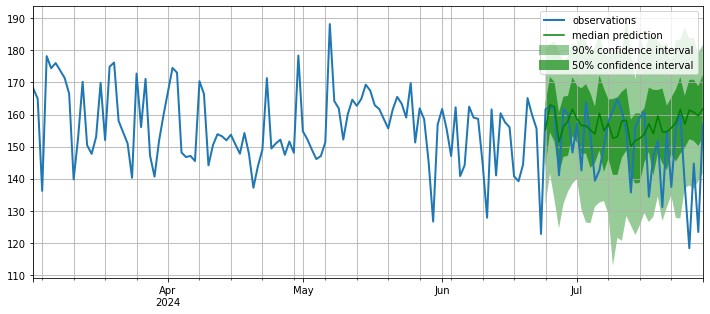

In [ ]:
from itertools import islice
from gluonts.evaluation.backtest import make_evaluation_predictions

def plot_forecasts(tss, forecasts, past_length, num_plots):
    for target, forecast in islice(zip(tss, forecasts), num_plots):
        ax = target[-past_length:].plot(figsize=(12, 5), linewidth=2)
        forecast.plot(color='g')
        plt.grid(which='both')
        plt.legend(["observations", "median prediction", "90% confidence interval", "50% confidence interval"])
        plt.show()

forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=predictor)
forecasts = list(forecast_it)
tss = list(ts_it)
plot_forecasts(tss, forecasts, past_length=150, num_plots=1)

In [ ]:
from gluonts.evaluation import Evaluator

evaluator = Evaluator(quantiles=[0.5], seasonality=2016)
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))
agg_metrics

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 22.85it/s]/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq



{'Coverage[0.5]': 0.6666666666666666,
 'MAE_Coverage': 0.16666666666666663,
 'MAPE': 0.07259584135479397,
 'MASE': 0.10615946517508869,
 'MSE': 200.95620388454861,
 'MSIS': 0.9670867889116751,
 'ND': 0.06705671987057932,
 'NRMSE': 0.09432209901983714,
 'OWA': nan,
 'QuantileLoss[0.5]': 362.8123245239258,
 'RMSE': 14.175902224710377,
 'abs_error': 362.8123474121094,
 'abs_target_mean': 150.29248046875,
 'abs_target_sum': 5410.529296875,
 'mean_absolute_QuantileLoss': 362.8123245239258,
 'mean_wQuantileLoss': 0.06705671564027535,
 'sMAPE': 0.0679175919956631,
 'seasonal_error': 94.93379365491009,
 'wQuantileLoss[0.5]': 0.06705671564027535}

In [ ]:
agg_metrics_seasonal, item_metrics_seasonal = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

df_metrics = pd.DataFrame.join(
    pd.DataFrame.from_dict(agg_metrics, orient='index').rename(columns={0: "DeepAR"}),
    pd.DataFrame.from_dict(agg_metrics_seasonal, orient='index').rename(columns={0: "Seasonal naive"})
)
df_metrics.loc[["MASE", "sMAPE", "RMSE"]]

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 27.27it/s]
/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq


,DeepAR,Seasonal naive
MASE,0.106159,0.106159
sMAPE,0.067918,0.067918
RMSE,14.175902,14.175902


In [ ]:
from gluonts.model.seasonal_naive import SeasonalNaivePredictor

seasonal_predictor_1W = SeasonalNaivePredictor(freq="5min", prediction_length=36, season_length=2016)

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=seasonal_predictor_1W)
forecasts = list(forecast_it)
tss = list(ts_it)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:32: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return ts + ts.freq * amount


In [ ]:
future_data = data
future_data = future_data.iloc[:100]

In [ ]:
future_data = future_data.set_index('ds')

In [ ]:
future_data = ListDataset(
    [{"start": future_data.index[0], "target": df['y'] }],
    freq = "1D")

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(future_data, predictor=seasonal_predictor_1W)
forecasts = list(forecast_it)
tss = list(ts_it)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:32: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return ts + ts.freq * amount


In [ ]:
tss

[                              0
 2015-01-01 00:00:00   89.058105
 2015-01-01 00:05:00   88.638428
 2015-01-01 00:10:00   80.884750
 2015-01-01 00:15:00   89.288376
 2015-01-01 00:20:00   86.867065
 ...                         ...
 2015-01-13 03:45:00  156.960571
 2015-01-13 03:50:00  130.886108
 2015-01-13 03:55:00  137.061111
 2015-01-13 04:00:00  139.740341
 2015-01-13 04:05:00  140.167175
 
 [3506 rows x 1 columns]]

In [ ]:
agg_metrics_seasonal, item_metrics_seasonal = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 22.47it/s]


AssertionError: ignored